<a href="https://colab.research.google.com/github/Darknessdark898/MLF/blob/main/MLFjankyProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/Darknessdark898/MLF.git


Cloning into 'MLF'...
remote: Enumerating objects: 1776, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 1776 (delta 4), reused 1 (delta 1), pack-reused 1767 (from 2)
Receiving objects: 100% (1776/1776), 48.66 MiB | 9.89 MiB/s, done.
Resolving deltas: 100% (42/42), done.
Updating files: 100% (1631/1631), done.


**DATA LOADING**
In this section we will load data for training and testing and also add labels.

Training Data:
Images shape: (1491, 72, 48)
Labels shape: (1491,)

Test Data:
Images shape: (120, 72, 48)
IDs shape: (120,)


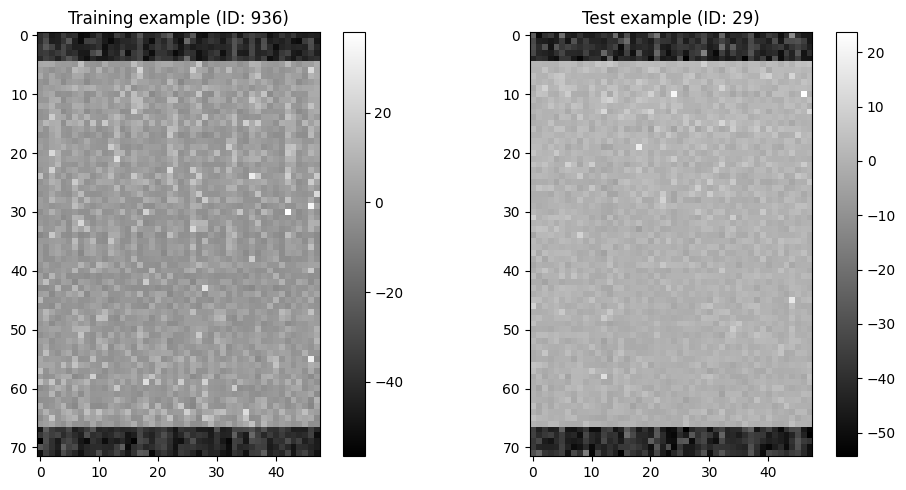

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

#labels cvs file load
labels_df = pd.read_csv('MLF/PROJECT/label_train.csv')

#set the paths to my Train and Test folders
train_folder_path = 'MLF/PROJECT/Train'
test_folder_path = 'MLF/PROJECT/Test'

#list all .npy files in both folders
train_npy_files = [f for f in os.listdir(train_folder_path) if f.endswith('.npy')]
test_npy_files = [f for f in os.listdir(test_folder_path) if f.endswith('.npy')]

#initializing of empty lists for images and labels
train_images = []
train_labels = []
test_images = []
test_ids = []  #storing of IDs for test data (pozriet ako pridat labels - asi vsetky 0)

#load training data
for file in train_npy_files:
    #get image ID form file
    image_id = int(file.split('.')[0])

    image = np.load(os.path.join(train_folder_path, file))

    #get the corresponding label from CSV
    label = labels_df.loc[labels_df['ID'] == image_id, 'target'].values[0]

    #add data to lists
    train_images.append(image)
    train_labels.append(label)

#load test data
for file in test_npy_files:
    #get image ID from file
    image_id = int(file.split('.')[0])

    image = np.load(os.path.join(test_folder_path, file))

    #add data to lists
    test_images.append(image)
    test_ids.append(image_id)

#convert to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_ids = np.array(test_ids)

#chceck of the shape of data
print("Training Data:")
print(f"Images shape: {train_images.shape}")
print(f"Labels shape: {train_labels.shape}")

print("\nTest Data:")
print(f"Images shape: {test_images.shape}")
print(f"IDs shape: {test_ids.shape}")



#visualize one example from training and one from test data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(train_images[605], cmap='gray')
plt.title(f"Training example (ID: {train_npy_files[605].split('.')[0]})")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(test_images[100], cmap='gray')
plt.title(f"Test example (ID: {test_npy_files[100].split('.')[0]})")
plt.colorbar()

plt.tight_layout()
plt.show()

# NEW DATA LOAD 18.4.2025

Training Data:
Images shape: (1491, 72, 48)
Labels shape: (1491,)

Test Data:
Images shape: (120, 72, 48)
IDs shape: (120,)


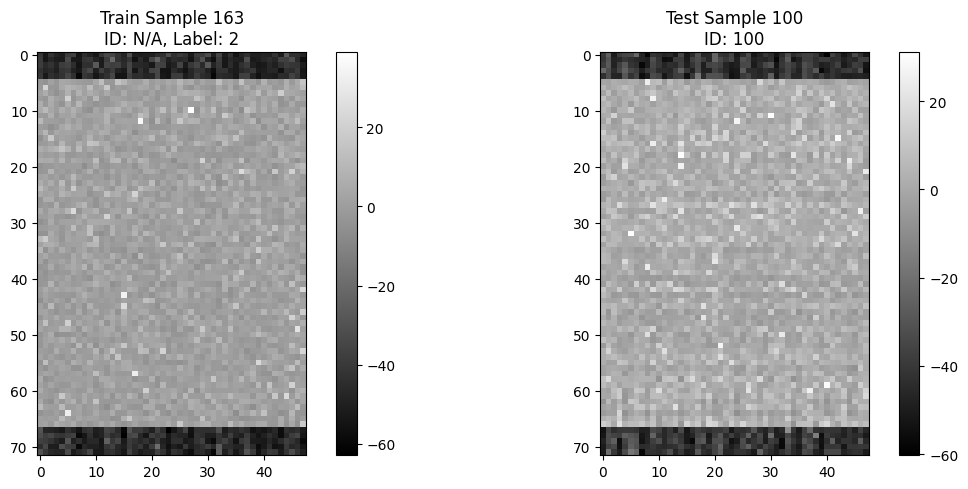


First 10 training labels:
Sample 0: Label = 0
Sample 1: Label = 0
Sample 2: Label = 0
Sample 3: Label = 0
Sample 4: Label = 0
Sample 5: Label = 0
Sample 6: Label = 0
Sample 7: Label = 0
Sample 8: Label = 0
Sample 9: Label = 0
Sample 10: Label = 2
Sample 11: Label = 0
Sample 12: Label = 0
Sample 13: Label = 0
Sample 14: Label = 0
Sample 15: Label = 0
Sample 16: Label = 0
Sample 17: Label = 0
Sample 18: Label = 1
Sample 19: Label = 0
Sample 20: Label = 0
Sample 21: Label = 1
Sample 22: Label = 0
Sample 23: Label = 0
Sample 24: Label = 1
Sample 25: Label = 0
Sample 26: Label = 0
Sample 27: Label = 0
Sample 28: Label = 0
Sample 29: Label = 0
Sample 30: Label = 1
Sample 31: Label = 0
Sample 32: Label = 0
Sample 33: Label = 0
Sample 34: Label = 0
Sample 35: Label = 0
Sample 36: Label = 0
Sample 37: Label = 0
Sample 38: Label = 1
Sample 39: Label = 0
Sample 40: Label = 1
Sample 41: Label = 0
Sample 42: Label = 0
Sample 43: Label = 0
Sample 44: Label = 0
Sample 45: Label = 0
Sample 46: Label 

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

# load CSV with labels
labels_df = pd.read_csv('MLF/PROJECT/label_train.csv')

# set paths
train_folder_path = 'MLF/PROJECT/Train'
test_folder_path = 'MLF/PROJECT/Test'

#get sorted lists of .npy files
train_npy_files = sorted([f for f in os.listdir(train_folder_path) if f.endswith('.npy')],
                         key=lambda x: int(x.split('.')[0]))
test_npy_files = sorted([f for f in os.listdir(test_folder_path) if f.endswith('.npy')],
                        key=lambda x: int(x.split('.')[0]))

#initialization of lists
train_data = []  #tuples of (image, label)
test_data = []   #tuples of (image, ID)

#load training data with corresponding labels
for file in train_npy_files:
    image_id = int(file.split('.')[0])
    image = np.load(os.path.join(train_folder_path, file))
    label = labels_df.loc[labels_df['ID'] == image_id, 'target'].values[0]
    train_data.append((image, label))

#load test data with IDs
for file in test_npy_files:
    image_id = int(file.split('.')[0])
    image = np.load(os.path.join(test_folder_path, file))
    test_data.append((image, image_id))

#unzip into separate lists
train_images, train_labels = zip(*train_data)
test_images, test_ids = zip(*test_data)

#convert to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_ids = np.array(test_ids)

#chceck of the shape of data
print("Training Data:")
print(f"Images shape: {train_images.shape}")  #should be (num_samples, 72, 48)
print(f"Labels shape: {train_labels.shape}")  #should be (num_samples,)

print("\nTest Data:")
print(f"Images shape: {test_images.shape}")   #should be (num_samples, 72, 48)
print(f"IDs shape: {test_ids.shape}")        #should be (num_samples,)

#visualize examples
def visualize_examples():
    plt.figure(figsize=(12, 5))

    #train example
    plt.subplot(1, 2, 1)
    idx = 163  #index
    plt.imshow(train_images[idx], cmap='gray')
    plt.title(f"Train Sample {idx}\nID: {test_ids[idx] if idx < len(test_ids) else 'N/A'}, Label: {train_labels[idx]}")
    plt.colorbar()

    #test example
    plt.subplot(1, 2, 2)
    idx = 100  #index
    plt.imshow(test_images[idx], cmap='gray')
    plt.title(f"Test Sample {idx}\nID: {test_ids[idx]}")
    plt.colorbar()

    plt.tight_layout()
    plt.show()

visualize_examples()

#some additional verification
print("\nFirst 10 training labels:")
for i, (img, label) in enumerate(zip(train_images[:100], train_labels[:100])):
    print(f"Sample {i}: Label = {label}")

# PREPARE DATA AND TRAIN MODEL

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

#split tuples into two lists
images, labels = zip(*train_data)

#convert to numpy arrays
X = np.array(images, dtype=np.float32)
y = np.array(labels)

#normalize pixel values to range [0, 1]
X = X / 255.0

#add channel dimension for grayscale images → (samples, 72, 48, 1) (ceknut ci je okej)
X = X[..., np.newaxis]

#onehot encode labels of 3 labels (0, 1, 2)
y = to_categorical(y, num_classes=3)

#split for train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(72, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  #3 output classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=16,
                    validation_data=(X_val, y_val))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 70, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 35, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 33, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10240)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,310,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,330,051 (5.07 MB)

 Trainable params: 1,330,051 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.7788 - loss: 0.6157 - val_accuracy: 0.8884 - val_loss: 0.3366
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9166 - loss: 0.2436 - val_accuracy: 0.9688 - val_loss: 0.1181
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.9569 - loss: 0.1380 - val_accuracy: 0.9866 - val_loss: 0.0747
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - accuracy: 0.9760 - loss: 0.0748 - val_accuracy: 0.9821 - val_loss: 0.0593
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.9875 - loss: 0.0524 - val_accuracy: 0.9509 - val_loss: 0.1036
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.9898 - loss: 0.0375 - val_accuracy: 0.9464 - val_loss: 0.1054
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.9804 - loss: 0.0592 - val_accuracy: 0.9866 - val_loss: 0.0586
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9859 - loss: 0.0409 - val_accuracy: 0.98

# TEST MODEL AND MAKE PREDICTION CSV

In [6]:
import pandas as pd
import numpy as np

# Extract just the images
test_images = [img for img, _ in test_data]
test_ids = [id for _, id in test_data]  # Optional, if you want to save IDs in CSV

# Convert to NumPy array and normalize
X_test = np.array(test_images, dtype=np.float32) / 255.0

# Reshape to (samples, 72, 48, 1)
X_test = X_test[..., np.newaxis]

# Predict class probabilities
pred_probs = model.predict(X_test)

# Get the class with the highest probability
predicted_classes = np.argmax(pred_probs, axis=1)

# If you want to include IDs (recommended for tracking):
df = pd.DataFrame({
    'ID': test_ids,
    'Predicted': predicted_classes
})

# Save to CSV
df.to_csv('cnn_predictions.csv', index=False)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step



Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 70, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 35, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 33, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10240)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,310,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,990,155 (15.22 MB)

 Trainable params: 1,330,051 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,660,104 (10.15 MB)

Model architecture plot saved as 'model_architecture.png'

Training History:


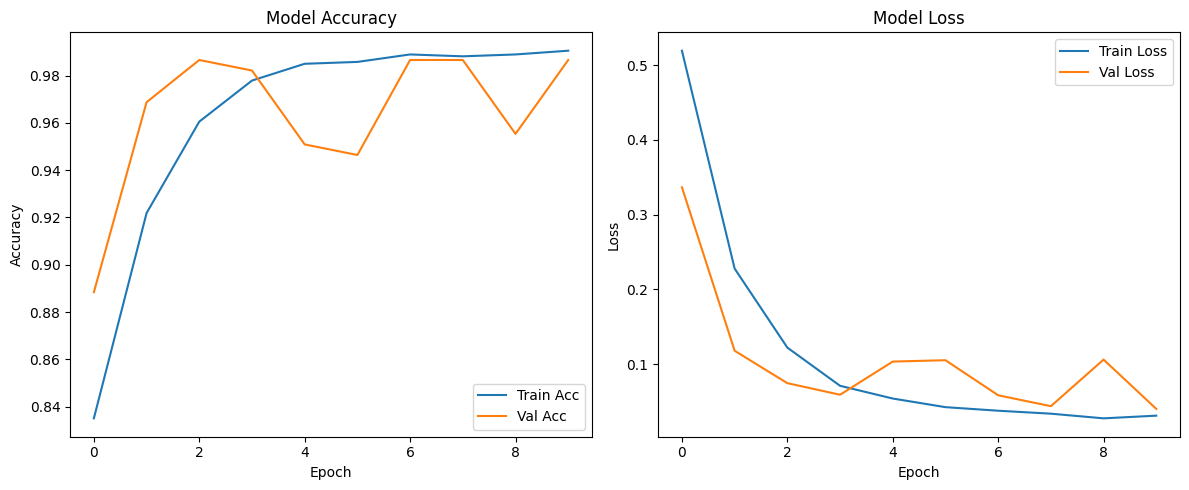


Validation Accuracy: 0.9866
Validation Loss: 0.0403
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


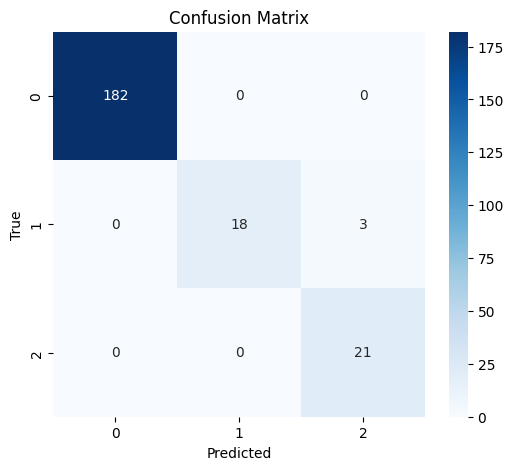


Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       182
           1     1.0000    0.8571    0.9231        21
           2     0.8750    1.0000    0.9333        21

    accuracy                         0.9866       224
   macro avg     0.9583    0.9524    0.9521       224
weighted avg     0.9883    0.9866    0.9865       224



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import plot_model

# 1. === Model Summary ===
print("\nModel Summary:")
model.summary()

# Optional: Save model architecture diagram
try:
    plot_model(model, to_file="model_architecture.png", show_shapes=True)
    print("Model architecture plot saved as 'model_architecture.png'")
except:
    print("Could not plot model. Ensure `pydot` and `graphviz` are installed.")

# 2. === Training History Plot ===
print("\nTraining History:")

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 3. === Evaluate on Validation Set ===
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# 4. === Confusion Matrix ===
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 5. === Classification Report ===
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, digits=4))


In [70]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# === Data prep (you already have train_data = [(image, label), ...]) ===

images, labels = zip(*train_data)
X = np.array(images, dtype=np.float32) / 255.0  # Normalize
X = X[..., np.newaxis]  # Add channel dim
y = to_categorical(np.array(labels), num_classes=3)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)

# === Model (keep it simple but solid) ===

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(72, 48, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# === Train (directly on arrays) ===

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=20
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 70, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 35, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 33, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 16, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 10240)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │     1,310,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,330,051 (5.07 MB)

 Trainable params: 1,330,051 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - accuracy: 0.7182 - loss: 0.6804 - val_accuracy: 0.8705 - val_loss: 0.4146
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 134ms/step - accuracy: 0.8821 - loss: 0.4068 - val_accuracy: 0.8973 - val_loss: 0.2580
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.9108 - loss: 0.2140 - val_accuracy: 0.9509 - val_loss: 0.1269
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.9563 - loss: 0.1220 - val_accuracy: 0.9777 - val_loss: 0.0765
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - accuracy: 0.9778 - loss: 0.0713 - val_accuracy: 0.9821 - val_loss: 0.0607
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 174ms/step - accuracy: 0.9890 - loss: 0.0447 - val_accuracy: 0.9866 - val_loss: 0.0679
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.9848 - loss: 0.0386 - val_accuracy: 0.9866 - val_loss: 0.0432
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step - accuracy: 0.9875 - loss: 0.0330 - val_accurac

# OTHERS

Training data shapes:
X_train: (1192, 72, 48, 1), y_train: (1192, 3)
X_val: (299, 72, 48, 1), y_val: (299, 3)
Test images: (120, 72, 48, 1)

Sample batch from generator:
Images shape: (32, 72, 48, 1)
Labels shape: (32, 3)


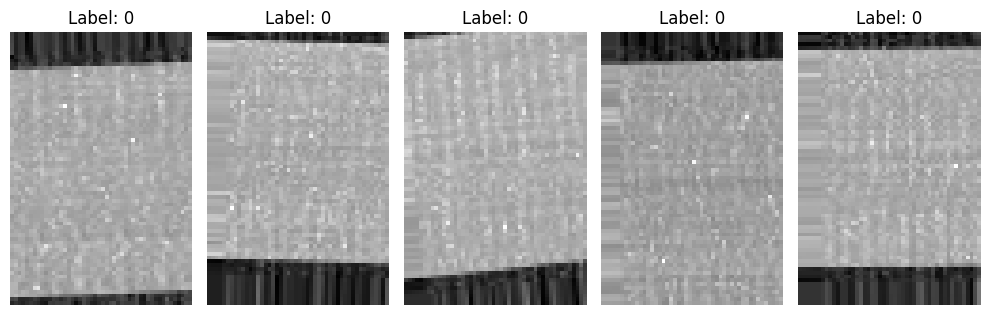

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load the labels CSV file
labels_df = pd.read_csv('MLF/PROJECT/label_train.csv')

# Set the paths to your Train and Test folders
train_folder_path = 'MLF/PROJECT/Train'
test_folder_path = 'MLF/PROJECT/Test'

# List all .npy files in both folders
train_npy_files = [f for f in os.listdir(train_folder_path) if f.endswith('.npy')]
test_npy_files = [f for f in os.listdir(test_folder_path) if f.endswith('.npy')]

# Function to load and preprocess images
def load_and_preprocess_images(file_list, folder_path, is_train=True):
    images = []
    labels_or_ids = []

    for file in file_list:
        # Load image
        image = np.load(os.path.join(folder_path, file))

        # Normalize pixel values to [0, 1]
        image = image.astype('float32') / 255.0

        # If the image is grayscale (2D), add a channel dimension
        if len(image.shape) == 2:
            image = np.expand_dims(image, axis=-1)

        # For training data, get labels
        if is_train:
            image_id = int(file.split('.')[0])
            label = labels_df.loc[labels_df['ID'] == image_id, 'target'].values[0]
            labels_or_ids.append(label)
        # For test data, just get IDs
        else:
            image_id = int(file.split('.')[0])
            labels_or_ids.append(image_id)

        images.append(image)

    return np.array(images), np.array(labels_or_ids)

# Load and preprocess training data
train_images, train_labels = load_and_preprocess_images(train_npy_files, train_folder_path, is_train=True)

# Load and preprocess test data
test_images, test_ids = load_and_preprocess_images(test_npy_files, test_folder_path, is_train=False)

# Encode labels to integers if they're categorical (strings)
if isinstance(train_labels[0], str):
    label_encoder = LabelEncoder()
    train_labels = label_encoder.fit_transform(train_labels)

# Convert labels to one-hot encoding
num_classes = len(np.unique(train_labels))
train_labels = to_categorical(train_labels, num_classes=num_classes)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

# Print shapes to verify everything looks correct
print("Training data shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Test images: {test_images.shape}")

# Data augmentation configuration (for when you create the model)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# The validation data should not be augmented!
val_datagen = ImageDataGenerator()

# Create generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

# Example of how to inspect one batch
sample_images, sample_labels = next(train_generator)
print("\nSample batch from generator:")
print(f"Images shape: {sample_images.shape}")
print(f"Labels shape: {sample_labels.shape}")

# Visualize some augmented images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')
    plt.title(f"Label: {np.argmax(sample_labels[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(X_val) // 32
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.7878 - loss: 0.6990 - val_accuracy: 0.8125 - val_loss: 0.5955
Epoch 2/10
 1/37 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.7188 - loss: 0.6152

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7188 - loss: 0.6152 - val_accuracy: 0.8125 - val_loss: 0.5781
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.7979 - loss: 0.4824 - val_accuracy: 0.8472 - val_loss: 0.5627
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9375 - loss: 0.2902 - val_accuracy: 0.8507 - val_loss: 0.5384
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.8758 - loss: 0.3974 - val_accuracy: 0.8750 - val_loss: 0.5647
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9375 - loss: 0.2595 - val_accuracy: 0.8750 - val_loss: 0.5603
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 218ms/step - accuracy: 0.9031 - loss: 0.2932 - val_accuracy: 0.8819 - val_loss: 0.5372
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9688 - loss: 0.1667 - val_accuracy: 0.8819 - val_loss: 0.6123
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - accuracy: 0.9020 - loss: 0.2854 - val_accuracy: 0.8854 - val_los

In [ ]:
import pandas as pd
import numpy as np

# Assuming you have:
# 1. Your trained model (from previous steps)
# 2. Preprocessed test_images (from previous steps)
# 3. test_ids (from previous steps)

# Generate predictions on test data
test_predictions = model.predict(test_images)

# If it's a classification task with multiple classes, get the class with highest probability
predicted_classes = np.argmax(test_predictions, axis=1)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'ID': test_ids,
    'target': predicted_classes
})

# Ensure all test IDs are included (in case some were filtered during preprocessing)
# This matches the format in test_format.csv
all_ids = pd.read_csv('MLF/PROJECT/test_format.csv')['ID']  # Read the template
submission_df = pd.merge(all_ids, submission_df, on='ID', how='left')

# Fill any missing predictions (if any) with 0 or your preferred default
submission_df['target'] = submission_df['target'].fillna(0).astype(int)

# Verify the format matches the example
print("Submission DataFrame head:")
print(submission_df.head())
print("\nSubmission DataFrame tail:")
print(submission_df.tail())

# Save to CSV
submission_df.to_csv('my_submission.csv', index=False)
print("\nSubmission file saved as 'my_submission.csv'")

# If you want to evaluate against a validation set (not test set)
# Assuming you have X_val and y_val from earlier
val_predictions = model.predict(X_val)
val_pred_classes = np.argmax(val_predictions, axis=1)
val_true_classes = np.argmax(y_val, axis=1)

# Calculate metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\nValidation Set Evaluation:")
print(f"Accuracy: {accuracy_score(val_true_classes, val_pred_classes):.4f}")
print("\nClassification Report:")
print(classification_report(val_true_classes, val_pred_classes))
print("\nConfusion Matrix:")
print(confusion_matrix(val_true_classes, val_pred_classes))

3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Submission DataFrame head:
   ID  target
0   0       1
1   1       0
2   2       1
3   3       0
4   4       0

Submission DataFrame tail:
      ID  target
115  115       1
116  116       0
117  117       0
118  118       0
119  119       1

Submission file saved as 'my_submission.csv'
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Validation Set Evaluation:
Accuracy: 0.8896

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       243
           1       1.00      0.82      0.90        28
           2       0.00      0.00      0.00        28

    accuracy                           0.89       299
   macro avg       0.63      0.61      0.61       299
weighted avg       0.81      0.89      0.85       299


Confusion Matrix:
[[243   0   0]
 [  5  23   0]
 [ 28   0   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **2ND** **try**

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# === Paths ===
train_folder = 'MLF/PROJECT/Train'
test_folder = 'MLF/PROJECT/Test'
labels_path = 'MLF/PROJECT/label_train.csv'

# === Load Labels ===
labels_df = pd.read_csv(labels_path)

# === Function to load and process images ===
def load_images(folder_path, file_list, labels_df=None, is_train=True):
    images = []
    labels_or_ids = []

    for file in file_list:
        image_path = os.path.join(folder_path, file)
        image = np.load(image_path).astype('float32')

        # Normalize to [0, 1]
        image /= np.max(np.abs(image))  # more robust than just /255

        # Add channel dimension (72, 48, 1)
        if image.ndim == 2:
            image = np.expand_dims(image, axis=-1)

        images.append(image)

        # Append label or ID
        image_id = int(file.split('.')[0])
        if is_train:
            label = labels_df.loc[labels_df['ID'] == image_id, 'target'].values[0]
            labels_or_ids.append(label)
        else:
            labels_or_ids.append(image_id)

    return np.array(images), np.array(labels_or_ids)

# === Get list of .npy files ===
train_files = sorted([f for f in os.listdir(train_folder) if f.endswith('.npy')])
test_files = sorted([f for f in os.listdir(test_folder) if f.endswith('.npy')])

# === Load data ===
X, y_raw = load_images(train_folder, train_files, labels_df, is_train=True)
X_test, test_ids = load_images(test_folder, test_files, is_train=False)

# === One-hot encode labels ===
class_names = sorted(np.unique(y_raw))  # ensure consistent class order
label_to_index = {label: i for i, label in enumerate(class_names)}
y = np.array([label_to_index[label] for label in y_raw])
y = to_categorical(y, num_classes=len(class_names))

# === Train/Validation Split (Stratified) ===
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Final shapes ===
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("X_test:", X_test.shape)
print("test_ids:", test_ids.shape)


X_train: (1192, 72, 48, 1)
y_train: (1192, 3)
X_val: (299, 72, 48, 1)
y_val: (299, 3)
X_test: (120, 72, 48, 1)
test_ids: (120,)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, BatchNormalization, Dropout,
    Flatten, Dense, Add, Activation
)

def residual_block(x, filters):
    shortcut = x
    x = Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)

    # Match channels of shortcut if needed
    if shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), padding='same')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def build_model(input_shape=(72, 48, 1), num_classes=3):
    inputs = Input(shape=input_shape)

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    x = residual_block(x, 64)
    x = MaxPooling2D((2, 2))(x)

    x = residual_block(x, 128)
    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model


model = build_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True)
    ]
)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 72, 48, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 72, 48,    │        320 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 48,    │        128 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 36, 24,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 36, 24,    │     18,496 │ max_pooling2d_3[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 36, 24,    │        256 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 36, 24,    │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 36, 24,    │        256 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 36, 24,    │      2,112 │ max_pooling2d_3[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 36, 24,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 36, 24,    │          0 │ add[0][0]         │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 18, 12,    │          0 │ activation[0][0]  │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 18, 12,    │     73,856 │ max_pooling2d_4[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 18, 12,    │        512 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 18, 12,    │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 18, 12,    │        512 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 18, 12,    │      8,320 │ max_pooling2d_4[

 Total params: 2,059,779 (7.86 MB)

 Trainable params: 2,058,947 (7.85 MB)

 Non-trainable params: 832 (3.25 KB)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 727ms/step - accuracy: 0.7742 - loss: 4.2299 - val_accuracy: 0.0936 - val_loss: 1.0841
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 713ms/step - accuracy: 0.9500 - loss: 0.1251 - val_accuracy: 0.8127 - val_loss: 0.7324
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 717ms/step - accuracy: 0.9556 - loss: 0.1108 - val_accuracy: 0.8127 - val_loss: 0.6491
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 29s 766ms/step - accuracy: 0.9823 - loss: 0.0681 - val_accuracy: 0.8127 - val_loss: 0.8805
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.9713 - loss: 0.0827 - val_accuracy: 0.8127 - val_loss: 1.6333
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 29s 753ms/step - accuracy: 0.9745 - loss: 0.0813 - val_accuracy: 0.8127 - val_loss: 1.7317
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 28s 733ms/step - accuracy: 0.9606 - loss: 0.1072 - val_accuracy: 0.8127 - val_loss: 1.3313
Epoch 8/50
29/38 ━━━━━━━━━━━━━━━━━━━━ 6s 707ms/step - accuracy: 0.9790 - loss: 0.0585

KeyboardInterrupt: 

In [ ]:
# Predict class probabilities
y_test_probs = model.predict(X_test)

# Get class with highest probability
y_test_preds = np.argmax(y_test_probs, axis=1)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step


In [ ]:
# Create a DataFrame with the required format
submission_df = pd.DataFrame({
    'ID': test_ids,
    'target': y_test_preds
})

# Sort by ID just to be consistent with sample format
submission_df = submission_df.sort_values('ID')

# Export to CSV (no index)
submission_df.to_csv('submission.csv', index=False)
